# Ground- and space-based data sources:
### It's important to understand your sampling

## Brian J. Harding
### bharding@ssl.berkeley.edu
### Space Sciences Laboratory, UC Berkeley

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Just for aesthetics
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.dpi'] = 100


In [4]:
!pip install xarray pandas astropy cdflib scipy ephem

You should consider upgrading via the '/Users/bharding/envs/env_python3.7/bin/python -m pip install --upgrade pip' command.


# Agenda
 1. Introduction to selected ground- and space-based data sources
 2. Example tidal extraction
 3. Questions


# Datasets

 1. Meteor Radars
 2. All-sky imagers
 3. Fabry-Perot Interferometers
 4. NASA's Ionospheric Connection Explorer (ICON)
     - With a focus on the MIGHTI instrument
 5. ESA's Swarm mission
     - With a focus on the magnetometer data
     
I won't be able to do these topics justice in 30 minutes, and I am biased towards my interest in low-latitude dynamics. See references for more information. ICON & Swarm are singled out because they are a unique new resource for studying Earth's dynamo, as they observe the important terms in generalized Ohm's Law:

$$J = \sigma (E + U \times B)$$

I am omitting some important modern datasets (TIMED, GOLD, ISRs, DMSP, Lidar, sounding rockets, to name a few). I recommend looking for old CEDAR student tutorials and dissertations for getting started.

For each dataset I will focus on:
 - What parameter is sampled
 - Trajectory of the measurement through spacetime
 - Averaging of the measurement across spacetime
 - Error sources
   - We all learn about the mathematics of Gaussian errors ("white noise") but the dominant error source in many CEDAR datasets is not Gaussian; rather it is normally a systematic error.
 

----   
# Meteor Radar

See Ryan Volz's introduction from 2021 CEDAR student day (https://youtu.be/uUrx5FdJlnY?t=1542)

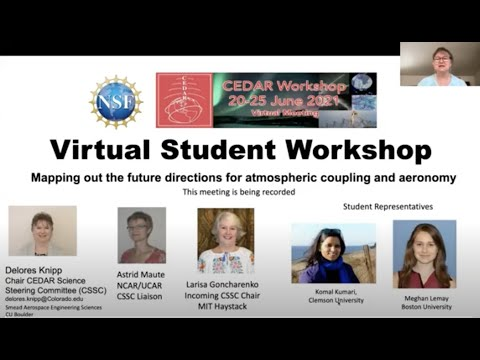

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('uUrx5FdJlnY', width=1000, height=600, start=1542)

<img src="https://drive.google.com/uc?export=view&id=1X0ssohsG24kY9V-iusSluLP43KfBlURT">



#### Parameter measured: 
   - **Neutral wind**
   
#### Principle of operation
   - Meteors leave plasma trails which almost-immediately start drifting with the neutral wind
   - Radar reflections off of the plasma trail provide the line-of-sight component of the wind
   
#### Measurement trajectory: 
   - **Fixed to the Earth**
   - **Resolved in altitude (~80-105 km)**
   
#### Averaging
   - Variable
   - **~200 km horizontally**
   - **~2km vertically**
   - **~30 min in time**

#### Errors:
   - Spatial registration of meteors by interferometry
   - Assumptions used to convert line-of-sight meteor data to wind
       - Vertical wind
       - Spatial homogeneity
       
#### How to get data
   - Instruments are operated independently and data is usually available by request

### Multistatic meteor radar

Recently, meteor radars have been deployed together into networks, allowing for resolution of features within the field of view.


<img src="https://drive.google.com/uc?export=view&id=1X9U1bwPVpNydsgD__Wp9wb1cDM9uK0ye">

<img src="figs/msmr2.gif" width="750" align="center">

Credit: Jorge Chau

----   
# An aside: Airglow

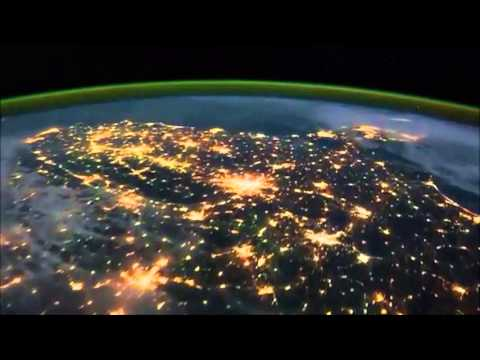

In [6]:
YouTubeVideo('TEQ4sb8gX6M', width=1000, height=600, start=15)

 - Immediate cause is atomic or molecular energy level transitions
 - Ultimate cause is usually the slow release of energy from solar radiation
 - Every emission is associated with different photochemical pathways
 - This means that interpretation can be difficult! But measurements are cheap
 - Ground-based measurements are almost always done at night

### Nighttime airglow spectrum
<img src="https://drive.google.com/uc?export=view&id=1XBG0e_7wf7RUNXGmePmrGGlFAUocMZd3">
Image credit: Les Cowley

<img src="https://drive.google.com/uc?export=view&id=1XBd7pmVzMstQ2kq1KtswFhNm4XbITsKl">


----   
# All-sky imagers

See Asti Bhatt's introduction from the 2021 CEDAR student day (https://youtu.be/uUrx5FdJlnY?t=4478)

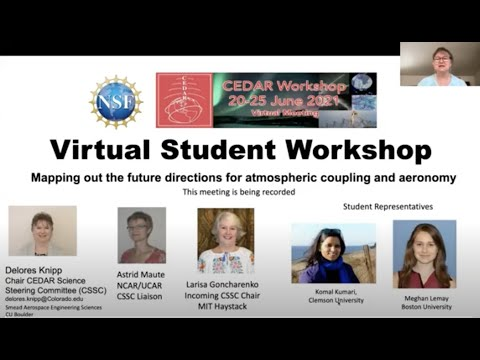

In [7]:
YouTubeVideo('uUrx5FdJlnY', width=1000, height=600, start=4478)

<img src="https://drive.google.com/uc?export=view&id=1XEMGB5RUr-WajlLwztIElXhJBvTD0l0u">

#### Parameter measured: 
   - **Airglow intensity** (integral of emission rate)
   
#### Principle of operation
   - Usually simply a picture of the sky looking up, in narrow wavelength range
   
#### Measurement trajectory: 
   - **Fixed to the Earth**
   - **Resolved horizontally**
   
#### Averaging
   - Variable
   - **Few km horizontally**
   - **Vertical integral over emission layer**
   - **Temporal integration of seconds to minutes**

#### Errors:
   - Difficult to calibrate for absolute radiance
   - Atmospheric absorption
   - Clouds
   - Moon
       
#### How to get data
   - Instruments are operated independently. Many providers make data freely available with no registration.

### Example from Boston University imagers (http://sirius.bu.edu/intro/)

<img src="https://drive.google.com/uc?export=view&id=1XNDAE2lFLYq5_fDQ9Rvz8C3eW-Qgv-jL">

Credit: http://sirius.bu.edu/aeronomy/

<img src="https://drive.google.com/uc?export=view&id=1XOfovdpbJrAimoNccKdijlLa6Y1rHvGr">

Example: See [Martinis et al. (2022)](https://onlinelibrary.wiley.com/doi/10.1029/2022GL098511) Supporting Information [Movie S1](https://www.ssl.berkeley.edu/~bharding/STEVE/Martinis2022_SI_s01.mp4)

----   
# Fabry-Perot Interferometers (FPIs)



<img src="https://drive.google.com/uc?export=view&id=1XQuwTZ_QYEvaFmhjV9Uw5pEbp4X-PrBW">

<img src="https://drive.google.com/uc?export=view&id=1XTPdd5YEpGbp55Jwfr85O5bD28a37mq2">

#### Parameter measured: 
   - **Neutral wind**
   - **Neutral temperature**
   
#### Principle of operation
   - Much like the meteor radar, a neutral wind will cause a (tiny) Doppler shift in the emission wavelength.
   - As neutral temperature goes up and down, the spectrum broadens and narrows
   - Interferometric observations can measure changes in the Doppler shift and breadth
   
#### Measurement trajectory: 
   - **Fixed to the Earth** (typically; an FPI was flown in the DE-2 satellite though)
   - **A single measurement is attributed to one altitude, or an average over altitude** (e.g., 200-300 km for the red 630.0 nm emission)
   
#### Averaging
   - **Few km horizontally** for narrow-field FPIs (see also Scanning Doppler Imagers which resolve horizontal variations)
   - **Vertical integral over emission layer**
   - **Temporal integration of seconds to minutes**

#### Errors:
   - Precision is easy; accuracy is hard
   - Atmospheric and instrument scattering
     - Especially important for measurements of vertical winds, which are smaller than horizontal winds
   - Clouds
   - Moon
       
#### How to get data
   - Instruments are operated independently. Many providers make data freely available with no registration on the [Madrigal](http://cedar.openmadrigal.org/openmadrigal) database
   
#### For more information
   - Shameless link to my own dissertation: See Chapter 2 for a background on FPIs: http://hdl.handle.net/2142/97286

### Multistatic FPIs

Like meteor radars, FPIs have begun to be deployed in networks. Estimation techniques can attempt to resolve horizontal features of the wind

Just a few FPIs I have worked with (there are many more!)

<img src="https://drive.google.com/uc?export=view&id=1XUOETdeAQo7iAJmLya5FTEjJ6rDy5VGd">

Results from the NATION network [(Makela et al., 2014)](http://doi.wiley.com/10.1002/2014JA019832), looking at wind convergences/divergences in associaition with the midnight temperature maximum [(Mesquita et al., 2018)](https://www.ann-geophys.net/36/541/2018/)

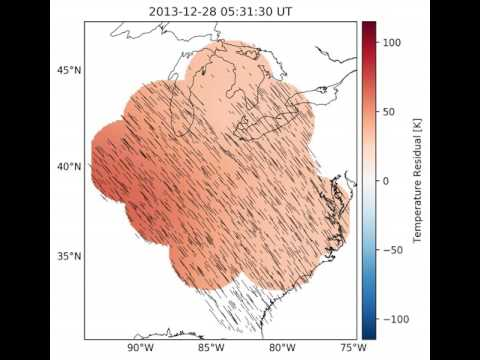

In [8]:
YouTubeVideo('Ql0NoVCe6Qg', width=1000, height=600, start=0)

----   
# Ionospheric Connection Explorer
https://icon.ssl.berkeley.edu/

<img src="https://drive.google.com/uc?export=view&id=1XeUyCOTrNHm34E2UCt5H1YIMHUB6BRk7">

**ICON has 4 instruments, 7 "Level 2" data products, and 2 currently released "Level 4" products.**

 - Immel, T. J., England, S. L., Mende, S. B., Heelis, R. A., Englert, C. R., Edelstein, J., … Sirk, M. M. (2018). The Ionospheric Connection Explorer Mission: Mission Goals and Design. Space Science Reviews, 214(1), 13. https://doi.org/10.1007/s11214-017-0449-2
 - Immel, T. J., et al. (Submitted). The Ionospheric Connection Explorer - Prime Mission Review. Space Science Reviews.

 - **Example code to read and plot ICON products** (credit: Joanne Wu): https://colab.research.google.com/github/YJWu-SSL/ICON_Data_Demo/blob/master/ICON_data_demo_Colab_v04.ipynb

**In the limited time here, I'll focus on MIGHTI and the neutral wind data product.**

 - Englert, C. R., Harlander, J. M., Brown, C. M., Marr, K. D., Miller, I. J., Stump, J. E., … Immel, T. J. (2017). Michelson Interferometer for Global High-Resolution Thermospheric Imaging (MIGHTI): Instrument Design and Calibration. Space Science Reviews, 212(1–2), 553–584. https://doi.org/10.1007/s11214-017-0358-4
 - Harding, B. J., Makela, J. J., Englert, C. R., Marr, K. D., Harlander, J. M., England, S. L., & Immel, T. J. (2017). The MIGHTI Wind Retrieval Algorithm: Description and Verification. Space Science Reviews, 212(1–2), 585–600. https://doi.org/10.1007/s11214-017-0359-3
 - Englert, C. R., et al. (In Preparation). On orbit performance of MIGHTI. Space Science Reviews

<img src="https://drive.google.com/uc?export=view&id=1XuxIHhI1Zv68az70pGl1_GALbkzUxzqZ">

<img src="https://drive.google.com/uc?export=view&id=1XwJrxfANUvAKV206NGDAab5ZskR4vDPs">

#### Parameter measured: 
   - **Neutral wind**
   - Neutral temperature (not discussed here)
   
#### Principle of operation
   - Similar to FPI except viewing the horizon
   
#### Measurement trajectory: 
   - **Low-earth orbit**
   - **Resolved in altitude** (90-300 km)

#### Averaging
   - **500-1200 km horizontally**
   - **2.5 km vertically**
   - **Temporal integration of 30-60 seconds**, but winds are assumed to be stable for 5-8 minutes, in order to combine MIGHTI-A and MIGHTI-B

#### Errors:
   - Precision is easy; accuracy is hard
   - See detailed discussion of error sources in upcoming SSR paper
   - Data gaps in South Atlantic Anomaly, between 110-210 km at night, etc.
       
#### How to get data
   - http://icon.ssl.berkeley.edu/Data
   - Space Physics Data Facility

----   
# Swarm

<img src="https://drive.google.com/uc?export=view&id=1XxV1ycZ5htf3Bza4Br4hkm30rgW9tbyr">

Credit: ESA/ATG medialab

**Swarm primary instruments are a magnetometer and a Langmuir probe**


**In the limited time here, I'll focus on the magnetometer and current estimates (specifically the equatorial electrojet)**



**Global ionospheric current system, driven by neutral winds**

<img src="https://drive.google.com/uc?export=view&id=1Y3Uz7HfH5O164hoAUaCn4xSPxulfZJhw">

Credit: Sabaka et al. (2015)

<img src="https://drive.google.com/uc?export=view&id=1Y629seWnPVu0wcHSpEwA3gplqFKJcVuu">

Credit: [Yamazaki et al. (2014)](http://dx.doi.org/10.1002/2014JA020243)

<img src="https://drive.google.com/uc?export=view&id=1Y6gpBQvf7wzKOCnLpaNsFL3v7c5vdkPB">

Credit: [Alken et al. (2013)](http://dx.doi.org/10.5047/eps.2013.09.008)

#### Parameter measured: 
   - **Equatorial electrojet intensity**
   
#### Principle of operation
   - Changes in magnetic field measured as the spacecraft flies over the equator can be used to estimate the strength of the currents (Biot-Savart Law)
   
#### Measurement trajectory: 
   - **One latitude profile every equator crossing** (~15 times per day in daytime)
   
#### Averaging
   - **Horizontal smoothing** by Biot-Savart and by estimation procedure
   - **Vertical integral over entire dynamo region**
   - **Currents assumed to be stable during equator overflight** (~20 minutes)

#### Errors:
   - **Difficult to quantify**, likely dominated by failure of assumptions used in the analysis (e.g., no longitudinal gradients, clean removal of other current signals, etc.)
       
#### How to get data
   - https://earth.esa.int/eogateway/missions/swarm
   
#### For more information

   - See Vires tool: https://vires.services/

**Swarm references**:
 - Olsen N, Friis-Christensen E, Floberghagen R, Alken P, et al. (2013), "The Swarm Satellite Constellation Application and Research Facility (SCARF) and Swarm data products", Earth, Planets and Space, Vol. 65, pp. 1189-1200  https://doi.org/10.5047/eps.2013.07.001
 - Friis-Christensen E, Lühr H, Hulot G (2006), "Swarm: A constellation to study the Earth's magnetic field", Earth, Planets and Space, Vol. 58, pp. 351-358 https://doi.org/10.1186/BF03351933
 
**Equatorial Electrojet (EEJ) references**:
 - Yamazaki, Y., & Maute, A. (2017). Sq and EEJ—A Review on the Daily Variation of the Geomagnetic Field Caused by Ionospheric Dynamo Currents. Space Science Reviews, 206(1–4), 299–405. https://doi.org/10.1007/s11214-016-0282-z
 - Alken, P. (2020). Estimating currents and electric fields at low latitudes from satellite magnetic measurements. In M. W. Dunlop, & H. Lühr (Eds.), Ionospheric multi-spacecraft analysis tools: Approaches for deriving ionospheric parameters (pp. 233–254). Springer International Publishing. https://doi.org/10.1007/978-3-030-26732-2_11
 - Alken, P., Maus, S., Vigneron, P., Sirol, O., & Hulot, G. (2013). Swarm SCARF equatorial electric field inversion chain. Earth, Planets and Space, 65(11), 1309–1317. https://doi.org/10.5047/eps.2013.09.008

----
# Space-based vs ground-based sampling of tides

 - Here focus on low-earth orbit (LEO):
     - ICON, TIMED, cubesats, etc.
 - Jargon:
     - "Ground-based/space-based"
     - "synpotic/asynoptic"
     - "LT/UT sampling"

**A simple expression for a global wave such as a tide:**

$$A_{n,s} \cos\left( n\Omega t + s\lambda - \phi_{n,s} \right)$$

where

 - $A = $ amplitude of wave
 - $\phi = $ phase of wave [rad]
 - $n = $ temporal frequency [day$^{-1}$]
 - $s = $ spatial frequency (often referred to as wavenumber) [unitless]
 - $\Omega = \frac{2\pi}{24\text{hr}}$
 - $t = $ time [hours]
 - $\lambda$ = longitude [rad]
 

 
Many waves in the "zoo" of global-scale waves can fit into this framework:



<img src="https://drive.google.com/uc?export=view&id=1Y9b3hyz6k8w6SOK7Wj61hrbhUcuFSLee">

Note this framework also works for planetary and tropical waves. For example:
 - Quasi 6-day wave (Q6DW): $n=\frac{1}{6}$, $s=1$
 - Quasi 2-day wave (Q2DW): $n=\frac{1}{2}$, $s=2$ or $s=3$ [(He et al., 2021)](https://doi.org/10.1029/2021GL093466)
 - Ultra-Fast Kelvin Wave (UFKW): $n\approx\frac{1}{3.5}$, $s=-1$

**Consider a ground-based site**
 - $\lambda = $constant
 
 $$A_{n,s} \cos\left( n\Omega t - \phi'_{n,s} \right)$$

**Now consider a (low-earth) orbital trajectory**

A view in inertial coordinates:
<img src="figs/leo.gif" width="350" align="center">

 - Every time the satellite completes an orbit to arrive back at the same latitude, it is sampling the same local time. (Except for the slow effects of orbital precession).
 - So, let's rewrite the tide expression in terms of local time ($t_{LT}$) instead of universal time ($t$)
 
 $$A_{n,s} \cos\left( n\Omega t + s\lambda - \phi_{n,s} \right)$$

 - A simple approximation to local time: $t_{LT} = t + \frac{\lambda}{\Omega}$ (*If I move 15 deg east, it's 1 hour later in LT*)
     - This assumes the Earth's orbit around the sun is circular and that Earth's rotation is in its orbital plane. A more accurate approach is to use the [Equation of time](https://en.wikipedia.org/wiki/Equation_of_time), up to a ~15 minute correction.
     
     
Substituting this in:

 $$A_{n,s} \cos\left( n\Omega \left[t_{LT} - \frac{\lambda}{\Omega}\right] + s\lambda - \phi_{n,s} \right)$$

$$A_{n,s} \cos\left( n\Omega t_{LT} + (s-n)\lambda - \phi_{n,s} \right)$$

which looks a lot like the original tidal equation except instead of $s$ we have $k=s-n$

 - For short ranges of time (~several days), $t_{LT}$ is nearly constant, yielding:
 
$$A_{n,s} \cos\left((s-n)\lambda - \phi''_{n,s} \right)$$


 - This is like the wave being Doppler-shifted by Earth's rotation
 - DE3 ($n=1$, $s=-3$) would give a zonal wavenumber of $|s-n| = 4$
  - "Wave-4"
  - "space-based wavenumber of 4"
  

  

Some references:
 - Forbes, J. M., Zhang, X., Heelis, R., Stoneback, R., Englert, C. R., Harlander, J. M., … Immel, T. J. (2021). Atmosphere-Ionosphere (A-I) Coupling as Viewed by ICON: Day-to-Day Variability Due to Planetary Wave (PW)-Tide Interactions. Journal of Geophysical Research: Space Physics, 126(6), 1–17. https://doi.org/10.1029/2020JA028927
     - *Section 2 has useful mathematical/theoretical background*
 - Lindzen, R. S., & Chapman, S. (1969). Atmospheric tides. Space Science Reviews, 10, 3–188.
 - Forbes, J. M., & Wu, D. (2006). Solar Tides as Revealed by Measurements of Mesosphere Temperature by the MLS Experiment on UARS. Journal of the Atmospheric Sciences, 63(7), 1776–1797. https://doi.org/10.1175/JAS3724.1
 - Häusler, K., & Lühr, H. (2009). Nonmigrating tidal signals in the upper thermospheric zonal wind at equatorial latitudes as observed by CHAMP. Annales Geophysicae, 27(7), 2643–2652. https://doi.org/10.5194/angeo-27-2643-2009
 - England, S. L. (2011). A review of the effects of non-migrating atmospheric tides on the Earth’s low-latitude ionosphere. Space Science Reviews, 168(1–4), 211–236. https://doi.org/10.1007/s11214-011-9842-4
 - Salby (1982). Sampling Theory for Asynoptic Satellite Observations. Part I: Space-Time Spectra, Resolution, and Aliasing. Journal of the Atmospheric Sciences. [https://doi.org/10.1175/1520-0469(1982)039<2577:STFASO>2.0.CO;2](https://doi.org/10.1175/1520-0469(1982)039<2577:STFASO>2.0.CO;2)

----
----
# Example code: Tides

### It is hard to overstate the utility of [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) for data reading, writing, wrangling, cleaning, statistics, and even some scientific computation.

#### When data are 2D/3D/4D (common in aeronomical data and models), [xarray](https://xarray.pydata.org/en/stable/index.html) is an extremely useful framework.

 - Tight connection to common data formats (hdf5, netCDF)
 - Seamless handling of missing data
 - Binning and data reduction 

In [9]:
import pandas as pd
import xarray as xr
import os
import urllib.request # for downloading data

### First, download data
 - One day of ICON-MIGHTI data from the green channel
 - Meteor radar dataset used in [Harding et al., (2021)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2020JA028947)
 - One day of Swarm EEF/EEJ data
 - One day of ICON-IVM data

In [10]:
## ICON-MIGHTI ##
fn = 'ICON_L2-2_MIGHTI_Vector-Wind-Green_2020-08-27_v04r000.NC'
url = 'https://spdf.gsfc.nasa.gov/pub/data/icon/l2/l2-2_mighti_vector-wind-green/2020/'+\
      'icon_l2-2_mighti_vector-wind-green_20200827_v04r000.nc'
if not os.path.exists(fn):
    print('Downloading MIGHTI data...')
    urllib.request.urlretrieve(url, fn)
    print('\t%s' % fn)
    
    
## Meteor radar ##
fn = 'Tirupati_SMR_data.nc'
url = 'https://zenodo.org/record/4433180/files/Tirupati_SMR_data.nc'
if not os.path.exists(fn):
    print('Downloading Meteor radar data...')
    urllib.request.urlretrieve(url, fn)
    print('\t%s' % fn)
    
    
## Swarm EEF/EEJ##
# Data can be found on the Swarm website, but to avoid the unzipping step, we'll just grab the
# file posted with this tutorial on Github.
fn = 'SW_OPER_EEFATMS_2F_20200827T000000_20200827T235959_0204.cdf'
url = 'https://github.com/bharding512/CEDAR_2022_Student_Demo/blob/main/'+\
      'SW_OPER_EEFATMS_2F_20200827T000000_20200827T235959_0204.cdf?raw=true'
if not os.path.exists(fn):
    print('Downloading Swarm EEF/EEJ data...')
    urllib.request.urlretrieve(url, fn)
    print('\t%s' % fn)
    

## ICON-IVM ##
fn = 'ICON_L2-7_IVM-A_2020-08-27_v06r000.NC'
url = 'https://spdf.gsfc.nasa.gov/pub/data/icon/l2/l2-7_ivm-a/2020/icon_l2-7_ivm-a_20200827_v06r000.nc'
if not os.path.exists(fn):
    print('Downloading IVM data...')
    urllib.request.urlretrieve(url, fn)
    print('\t%s' % fn)

print('Done.')

Done.


#### Load and plot MIGHTI data at ~105 km altitude

In [11]:
# This is a simple reader for MIGHTI L2.2 data

def L22_to_dataset(L22_fn, qthresh=None, drop=True):
    '''
    Read a L22 file into an xarray.Dataset.
    
    qthresh = if not None, all data with quality below this value will be set to NaN. This affects:
        - u, v, u_error, v_error
    drop    = if True, drop times that have all-NaN wind profiles

    
    Also add ascending/descending flag and do some other housekeeping.
    '''
    
    ds0 = xr.open_dataset(L22_fn)
    
    # Build new dataset with certain variables
    emission_color = L22_fn.split('/')[-1].split('_')[3].split('-')[-1].lower() # red or green
    epoch = ds0.Epoch 
    t = pd.to_datetime(pd.to_datetime('1970-01-01') + pd.to_timedelta(epoch.values, unit='ms'))
    alt = ds0.ICON_L22_Altitude.values
    
    d = {
        'u':       (['time','alt'], ds0.ICON_L22_Zonal_Wind.values),
        'v':       (['time','alt'], ds0.ICON_L22_Meridional_Wind.values),
        'u_error': (['time','alt'], ds0.ICON_L22_Zonal_Wind_Error.values),
        'v_error': (['time','alt'], ds0.ICON_L22_Meridional_Wind_Error.values),
        'lon':     (['time','alt'], ds0.ICON_L22_Longitude.values),
        'lat':     (['time','alt'], ds0.ICON_L22_Latitude.values),
        'q':       (['time','alt'], ds0.ICON_L22_Wind_Quality.values),
        'sza':     (['time','alt'], ds0.ICON_L22_Solar_Zenith_Angle.values),
        'slt':     (['time','alt'], ds0.ICON_L22_Local_Solar_Time.values),
    }

    ds = xr.Dataset(
        d,
        coords={
            'time':('time',t),
            'alt' :('alt',alt)
        }
    )
    
    ds = ds.sortby('time') # This is sometimes necessary for a reason I don't understand
    
    # Add ascending/descending flag
    iref = 4 # Use a particular altitude to reference ascending/descending
    dsi = ds.isel(alt=iref)
    dsi = dsi.dropna(dim='time', subset=['lat']) # Drop so that dlat calculation is never nan
    dlat = dsi.lat.diff(dim='time')
    asc = dlat >= 0
    desc = dlat < 0
    assert (asc | desc).all(), "Something went wrong: every point should be either ascending or descending."
    dt = pd.to_timedelta(dsi.time[1:].values - dsi.time[:-1].values)
    long_gap = dt > pd.to_timedelta('5min') # It is too risky to go over a gap longer than 5min. Set asc=nan
    ds['asc'] = asc.where(~long_gap)
    
    # Quality control
    if qthresh is not None:
        
        # Winds
        vars_to_mask = ['u', 'v', 'u_error', 'v_error'] # Note q should be done at the very end
        for var in vars_to_mask:
            if var in ds: # Not all of these are included if slim=True
                ds[var] = ds[var].where(ds.q >= qthresh)
        ds['q'] = ds['q'].where(ds.q >= qthresh)
        
    if drop:
        ds = ds.dropna('time',how='all', subset=['u','v']) # Drop times which have all-NaN wind profiles
    
    ds0.close()
    del ds0
    return ds



In [12]:
# Load and only keep good data
ds = L22_to_dataset('ICON_L2-2_MIGHTI_Vector-Wind-Green_2020-08-27_v04r000.NC', qthresh=0.99)

In [13]:
ds

<xarray.Dataset>
Dimensions:  (time: 1634, alt: 84)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-27T00:02:49.717000 ... 2020-08-27T...
  * alt      (alt) float64 88.38 91.33 94.28 97.21 ... 297.7 300.0 302.3 304.6
Data variables:
    u        (time, alt) float64 nan nan -88.67 -98.18 ... nan nan nan nan
    v        (time, alt) float64 nan nan -4.678 131.5 82.07 ... nan nan nan nan
    u_error  (time, alt) float64 nan nan 1.305 1.232 1.694 ... nan nan nan nan
    v_error  (time, alt) float64 nan nan 1.26 1.223 1.453 ... nan nan nan nan
    lon      (time, alt) float64 289.9 289.9 289.9 289.9 ... 255.6 255.6 255.6
    lat      (time, alt) float64 3.651 3.601 3.551 3.501 ... -10.47 nan nan
    q        (time, alt) float64 nan nan 1.0 1.0 1.0 nan ... nan nan nan nan nan
    sza      (time, alt) float64 109.2 109.2 109.2 109.2 ... 77.41 77.41 nan nan
    slt      (time, alt) float64 19.4 19.4 19.4 19.4 ... 17.05 17.05 nan nan
    asc      (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

In [14]:
# Pick a single altitude
dsi = ds.sel(alt=105, method='nearest')

<IPython.core.display.Javascript object>


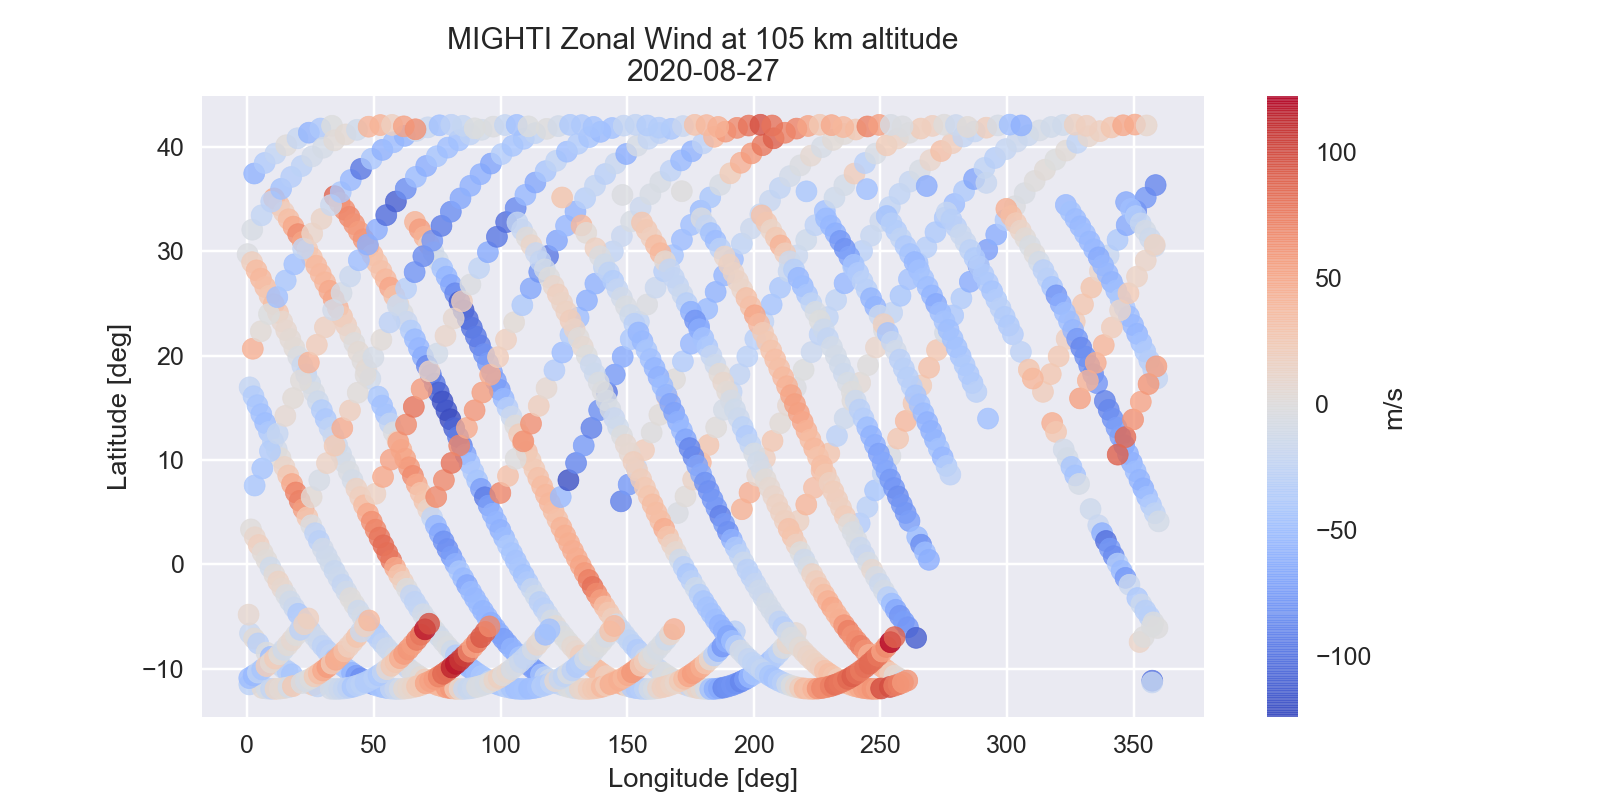

Text(0, 0.5, 'Latitude [deg]')

In [15]:
plt.figure(figsize=(5,2.5))
plt.scatter(dsi.lon, dsi.lat, c=dsi.u, s=70, alpha=0.8, cmap='coolwarm')
plt.colorbar(label='m/s')
plt.title('MIGHTI Zonal Wind at 105 km altitude\n2020-08-27')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

#### Now pick a latitude range and pick ascending/descending orbit

In [16]:
lat_min = 15
lat_max = 20

# Pick a latitude range
dsi = dsi.where((dsi.lat > lat_min) & (dsi.lat < lat_max), drop=True)

# Pick ascending or descending
dsi = dsi.where(dsi.asc == 0, drop=True)

# Drop samples with missing wind values
dsi = dsi.dropna(dim='time', subset=['u','v'])

#### Check that local time is (nearly) constant

<IPython.core.display.Javascript object>


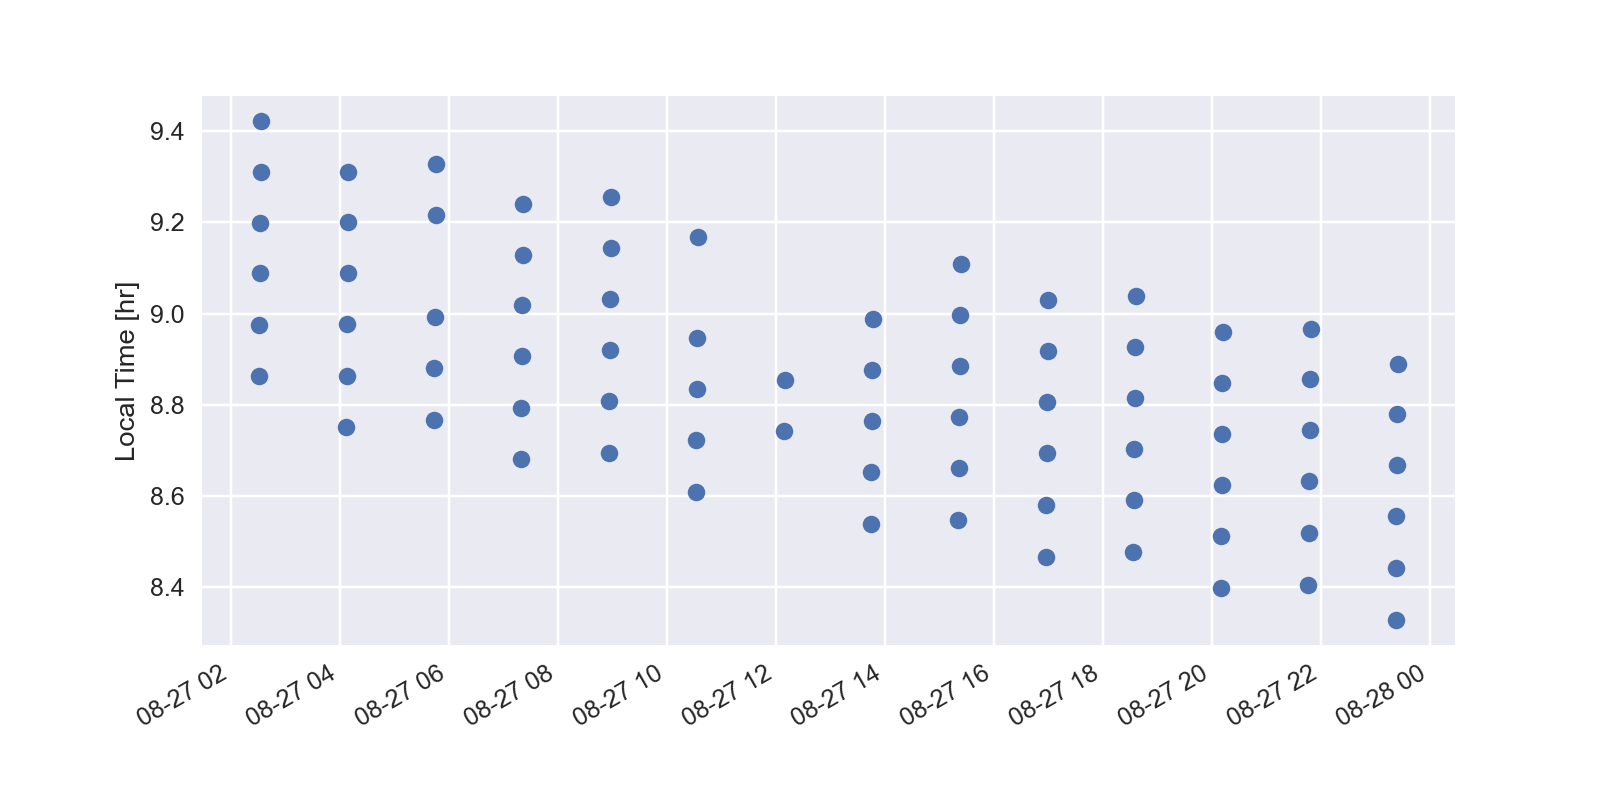

Text(0, 0.5, 'Local Time [hr]')

In [17]:
plt.figure(figsize=(5,2.5))
plt.plot(dsi.time, dsi.slt, 'C0o')
plt.gcf().autofmt_xdate()
plt.ylabel('Local Time [hr]')

<IPython.core.display.Javascript object>


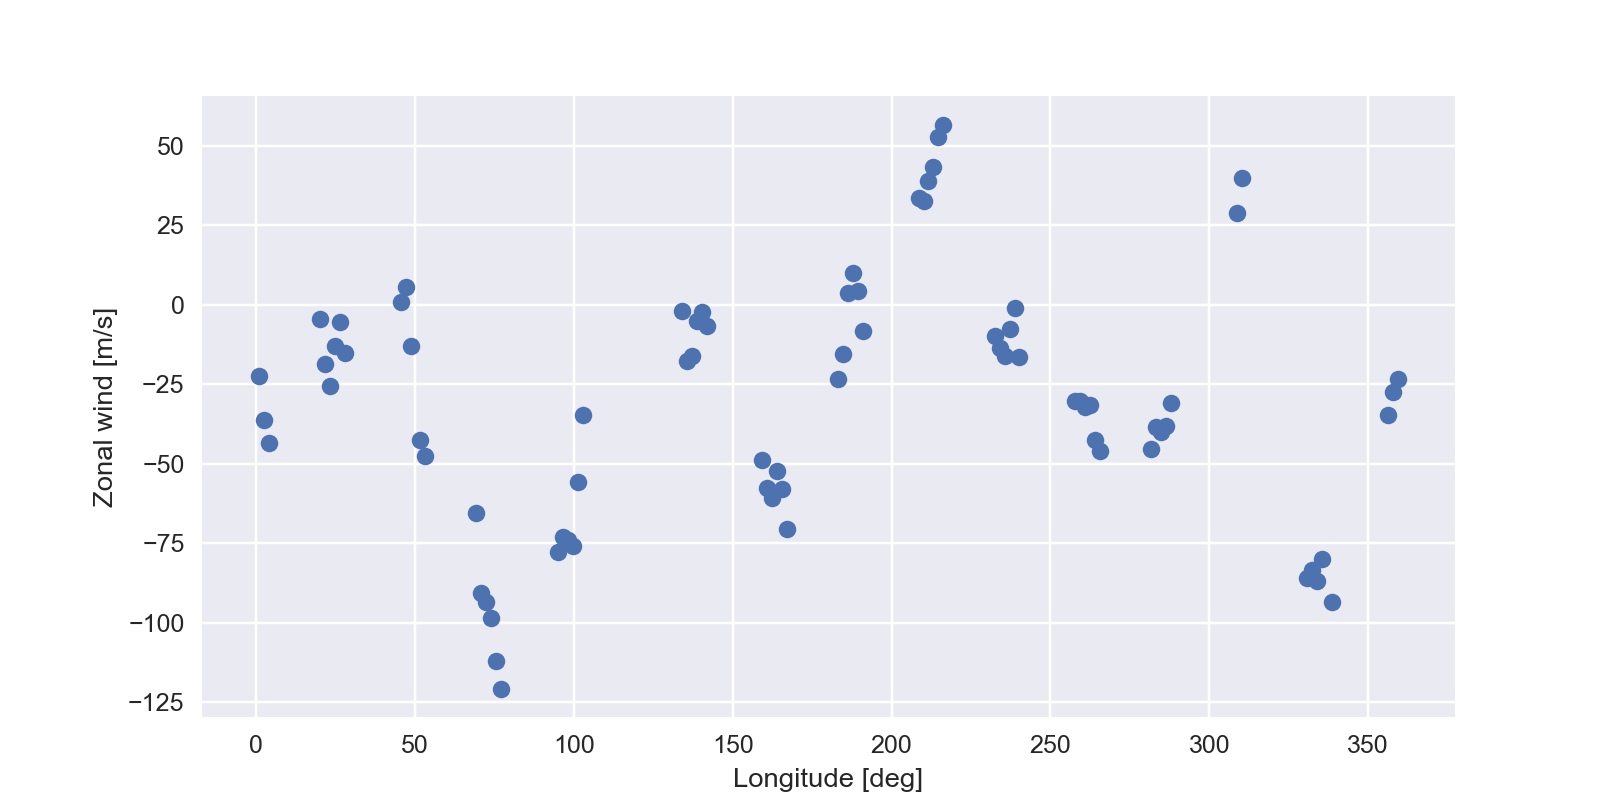

Text(0, 0.5, 'Zonal wind [m/s]')

In [18]:
plt.figure(figsize=(5,2.5))
plt.plot(dsi.lon, dsi.u, 'C0o')
plt.xlabel('Longitude [deg]')
plt.ylabel('Zonal wind [m/s]')

### There are apparent periodicities in the data

### Find dominant frequency content using Lomb-Scargle Periodogram: see [VanderPlas et al. (2018)](https://iopscience.iop.org/article/10.3847/1538-4365/aab766#:~:text=The%20Lomb%E2%80%93Scargle%20periodogram%20is%20a%20method%20that%20allows%20efficient,determining%20the%20period%20of%20oscillation.) for details

The Lomb-Scargle periodogram can be used to identify spectral peaks when data are not evenly sampled.

<IPython.core.display.Javascript object>


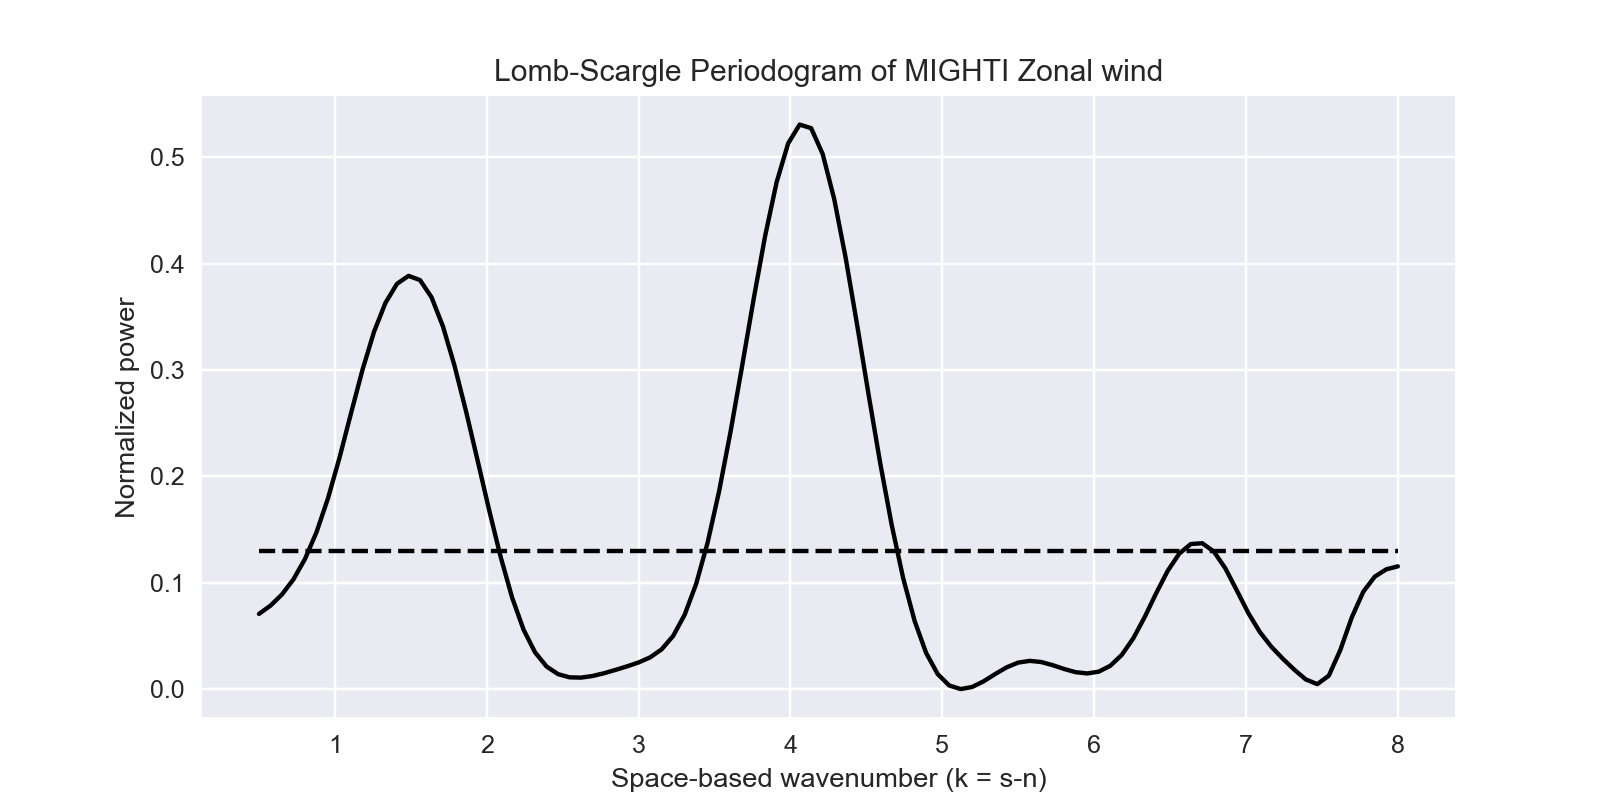

Text(0.5, 1.0, 'Lomb-Scargle Periodogram of MIGHTI Zonal wind')

In [19]:
from astropy.timeseries import LombScargle

Nk = 100 # number of frequency samples
k = np.linspace(0.5, 8, Nk) # k = |s-n|, running from half a day to 7-per-day (Nyquist rate for 15 orbits per day gives 7.5

# Compute periodogram
lomb = LombScargle(dsi.lon / 360., dsi['u']) # Note that longitude is expressed in radians
p = lomb.power(k)

# And find false-alarm level (The level of power expected from noise at some level of confidence. Here we'll use 90%.)
fa = lomb.false_alarm_level(0.10, method='bootstrap', minimum_frequency = k[0], maximum_frequency = k[-1])

plt.figure(figsize=(5,2.5))
plt.plot(k, p, 'k-')
plt.plot(k, fa*np.ones_like(k), 'k--')
plt.xlabel('Space-based wavenumber (k = s-n)')
plt.ylabel('Normalized power')
plt.title('Lomb-Scargle Periodogram of MIGHTI Zonal wind')

### This suggests the dominant wave is $s-n=4$, with a possible $s-n\approx1.5$ contribution.

### The following code fits sinusoids to unevenly sampled data using scipy.optimize

In [20]:
### NOTE: This is a nonlinear least squarse problem and thus convergence is not guaranteed.
### Please take care in applying this code to your problem.

from scipy import optimize

def waves(p, x, kfit):
    '''
    Return a superposition of waves evaluated at the given "x" coordinates. 
    This is intended to be used as a forward model
   
    x = Array of (psuedo-)longitudes [deg]
    p = [wave-0 amp (DC), wave-1 cos part, wave-1 sin part, wave-2 cos part, wave-2 sin part, etc....]
         For however many terms you want to model. Length must be odd.
         phase is interpreted in radians.  amp0 * cos (2*pi*k*x) + amp1 * sin(2*pi*k*x)
    kfit = which wavenumbers to use. Don't include 0 -- it will be added automatically.
    '''
    y = p[0] * np.ones_like(x)
    for i in range(len(kfit)):
        y += p[2*i+1] * np.cos(2*np.pi * kfit[i] * x/360. )  +  p[2*i+2] * np.sin(2*np.pi * kfit[i] * x/360.)
    return y


def myfunc(p, x, data, kfit):
    '''
    Function to minimize. Calls "waves(...)" above. This ignores nans in "data".
   
    data = waves(p,x) + "noise"
   
    p = parameters to optimize
    x = Pseudolongitude [deg]
    data = data to fit to
    kfit = which wavenumbers to fit
    '''    
    return data - waves(p, x, kfit)


def fit(x, data, kfit):
    '''
    x = Pseudolongitude [deg]
    data = data to fit to
    kfit = which wavenumbers to use.
    '''    
    
    p0 = np.zeros(2*len(kfit)+1)
    p0[0] = np.mean(data) # Initial guess of the mean
    
    try:
        res = optimize.least_squares(myfunc, p0, args=(x, data, kfit))
        if not res.success:
            print('Fit failed')
            return np.nan*np.ones_like(p0)
    except Exception as e:
        print(e)
        return np.nan*np.ones_like(p0)
    
    p = res.x
    return p


def p_to_amp_phase(p):
    '''
    Convert the p array to an amplitude and phase of each component. 
    [amp0, phase0, amp1, phase1, etc.]
    
    Note that amp0 is DC value and phase0 will be np.nan.
    '''
    a = np.zeros(len(p)+1)
    a[0] = p[0]
    a[1] = np.nan
    for i in range(1,len(a)//2):
        c = p[2*i-1] + 1j*p[2*i]
        a[2*i]   = abs(c)
        a[2*i+1] = np.angle(c)
    return a

In [21]:
kfit = [1.3,4] # Fit wave-1.3 and wave-4
pfit = fit(dsi.lon, dsi.u, kfit)
a = p_to_amp_phase(pfit)

print('Wave-1 amplitude: %.1f m/s' % a[2])
print('Wave-4 amplitude: %.1f m/s' % a[4])

Wave-1 amplitude: 27.3 m/s
Wave-4 amplitude: 37.5 m/s


<IPython.core.display.Javascript object>


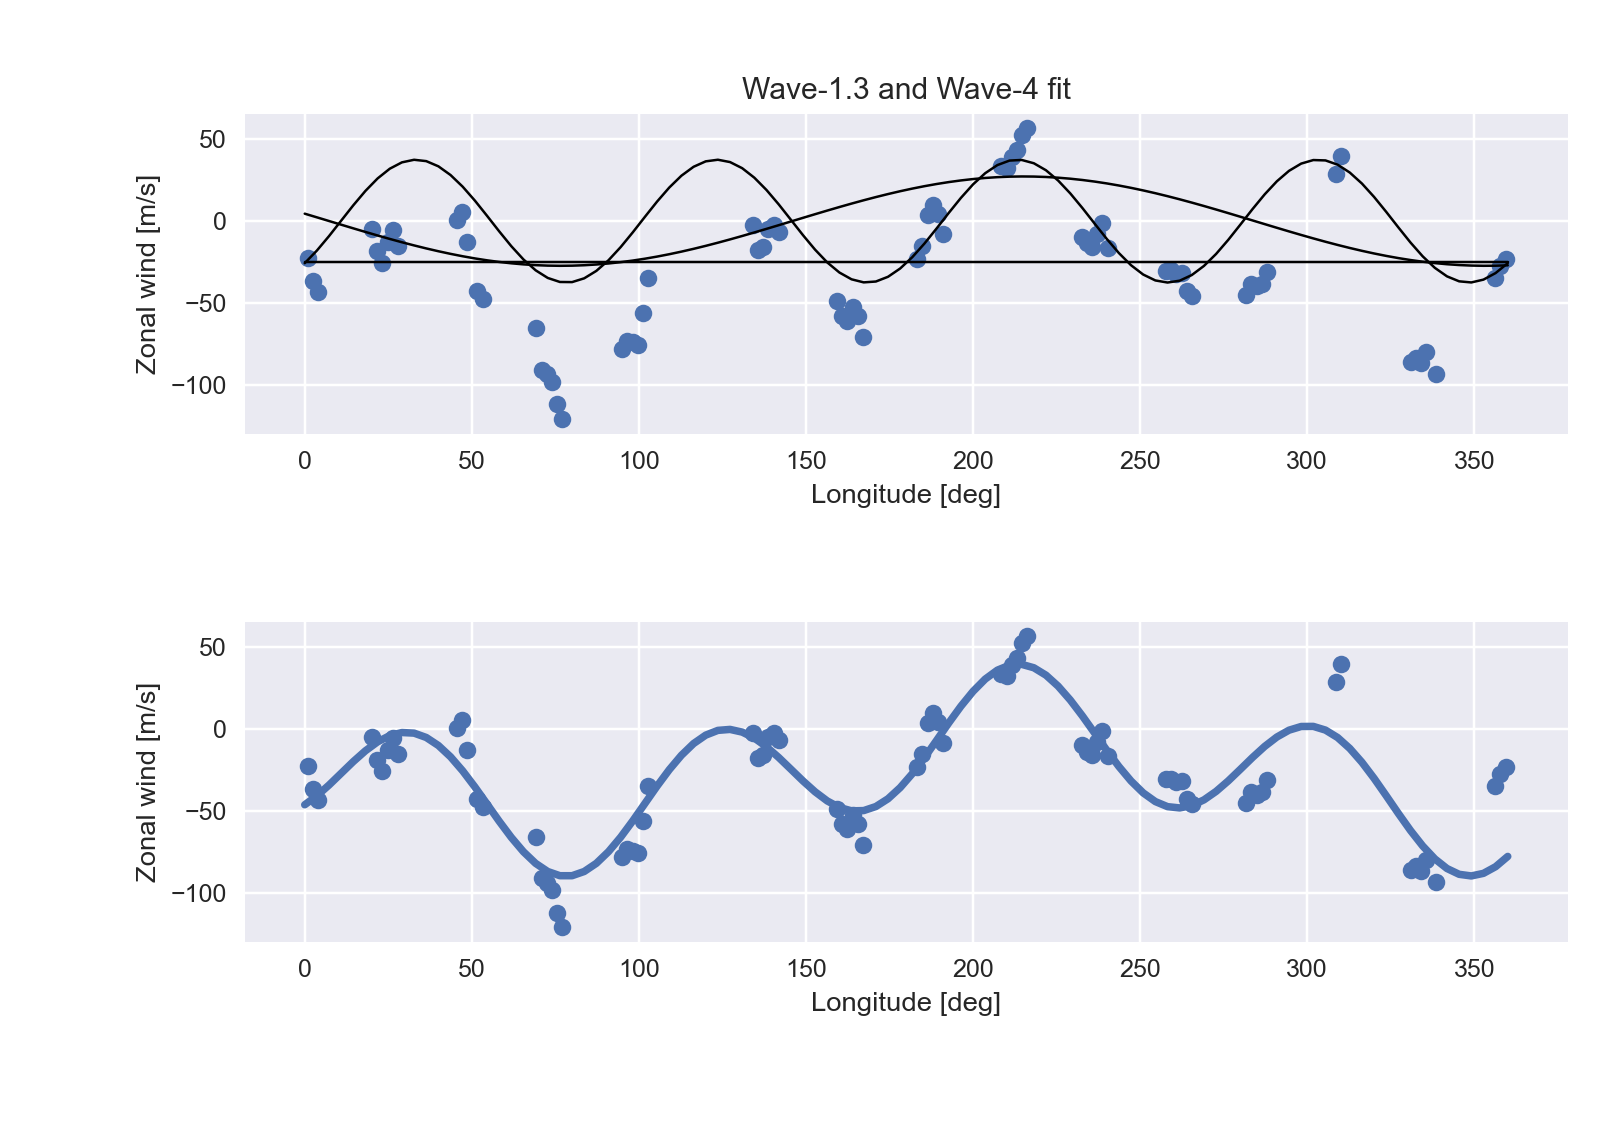

In [22]:
plt.figure(figsize=(5,3.5))

plt.subplot(2,1,1)
# Plot data
plt.plot(dsi.lon, dsi.u, 'C0o')
# Plot individual terms of fit
lon = np.linspace(0,360,100)
plt.plot(lon, waves([pfit[0], 0      , 0      , 0      , 0      ], lon, kfit), 'k-', lw=1)
plt.plot(lon, waves([0      , pfit[1], pfit[2], 0      , 0      ], lon, kfit), 'k-', lw=1)
plt.plot(lon, waves([0      , 0      , 0      , pfit[3], pfit[4]], lon, kfit), 'k-', lw=1)
plt.xlabel('Longitude [deg]')
plt.ylabel('Zonal wind [m/s]')
plt.title('Wave-1.3 and Wave-4 fit')

plt.subplot(2,1,2)
# Plot data
plt.plot(dsi.lon, dsi.u, 'C0o')

# Plot fit
lon = np.linspace(0, 360, 100) # regular longitude grid
plt.plot(lon, waves(pfit, lon, kfit), 'C0-', lw=3)
plt.xlabel('Longitude [deg]')
plt.ylabel('Zonal wind [m/s]')

plt.tight_layout()


### The fit looks decent, but we need to plot the residual to check if we missed any obvious waves


<IPython.core.display.Javascript object>


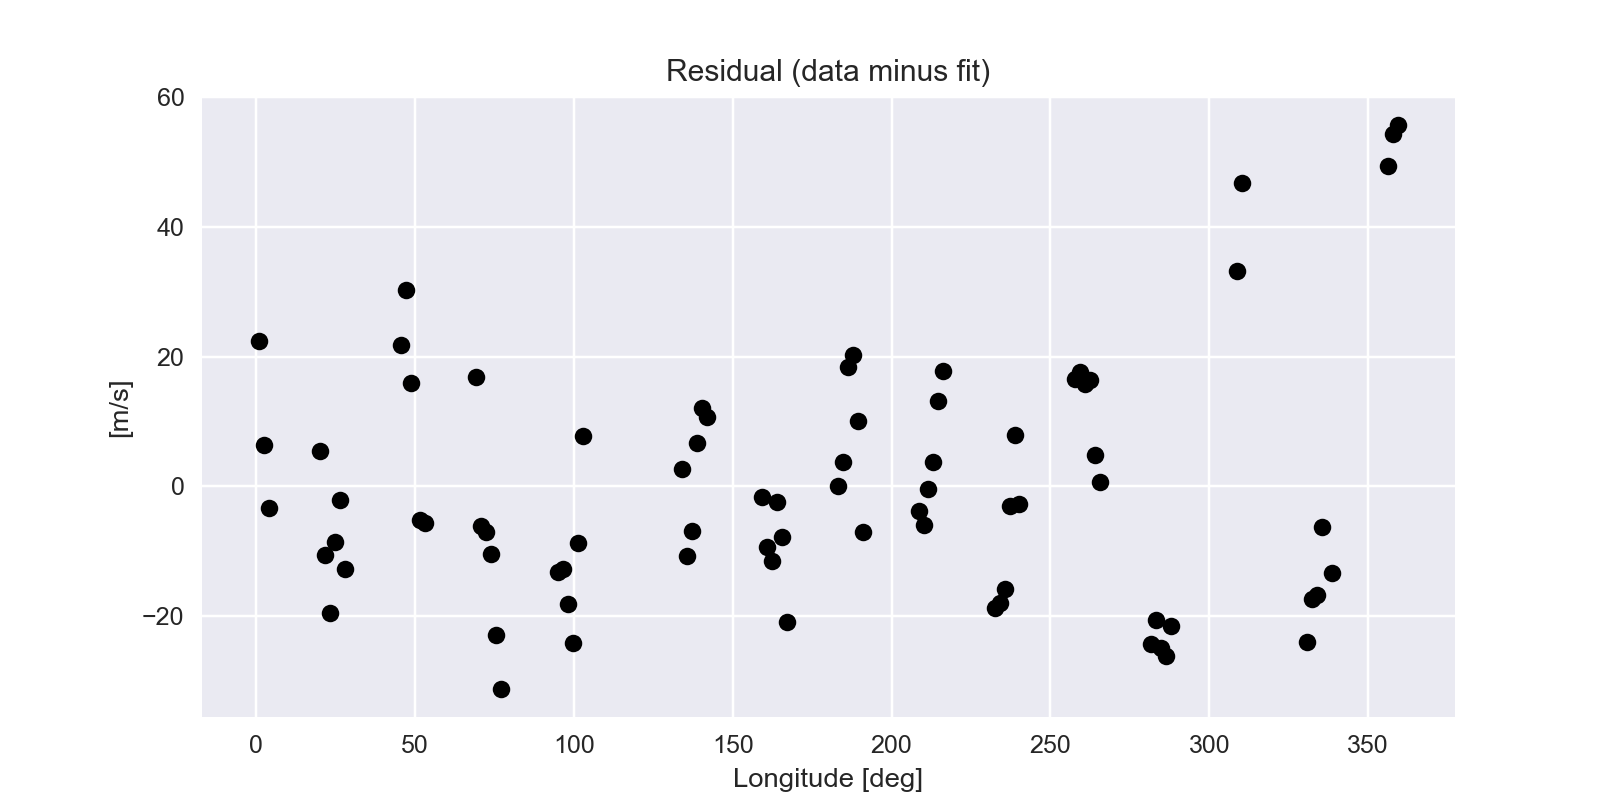

In [23]:
resid = dsi.u - waves(pfit, dsi.lon, kfit)

plt.figure(figsize=(5,2.5))
plt.plot(dsi.lon, resid, 'ko')
plt.xlabel('Longitude [deg]')
plt.ylabel('[m/s]')
plt.title('Residual (data minus fit)');

# What wave or waves are contributing to this wave-4 pattern? DE3, SE2?

<img src="https://drive.google.com/uc?export=view&id=1YAz5qUX4m8Xq5ZwW9-Qla0U7Nqe3XCAp">

 - Ideally what you'd want to do is to identify a ground-based site:
     - from latitudes 15-20 N
     - with good data quality at 105 km
     - with (publicly-available) data on 27 Aug 2020
     - And even more ideally, you'd want multiple sites separated in longitude
 - I couldn't find a site which satisfied those constraints without more time/effort. 
 - For the purposes of this example we'll use data from a different season, which is publicly available (https://zenodo.org/record/4433180)

# Meteor radar example

In [24]:
dsr = xr.open_dataset('Tirupati_SMR_data.nc') # Obtained from https://zenodo.org/record/4433180

In [25]:
dsr

<xarray.Dataset>
Dimensions:  (alt: 30, time: 5226)
Coordinates:
  * alt      (alt) float64 75.5 76.5 77.5 78.5 79.5 ... 101.5 102.5 103.5 104.5
  * time     (time) datetime64[ns] 2019-12-01T00:15:00 ... 2020-04-10T11:45:00
Data variables:
    w0_err   (time, alt) float64 ...
    meteors  (time, alt) float64 ...
    v0_err   (time, alt) float64 ...
    u0       (time, alt) float64 ...
    v0       (time, alt) float64 ...
    u0_err   (time, alt) float64 ...
    w0       (time, alt) float64 ...
    site     |S8 ...
    lat      float64 ...
    lon      float64 ...
Attributes:
    Title:        Specular Meteor Radar wind estimates from Tirupati, used in...
    Information:  This dataset was used to generate the figures in the paper ...
    Contact:      Brian Harding (bharding@ssl.berkeley.edu)

#### Select a several day period
Provides better spectral resolution than a single day


In [26]:
dsr = dsr.sel(time=slice('2019-12-01','2019-12-08'))

<IPython.core.display.Javascript object>


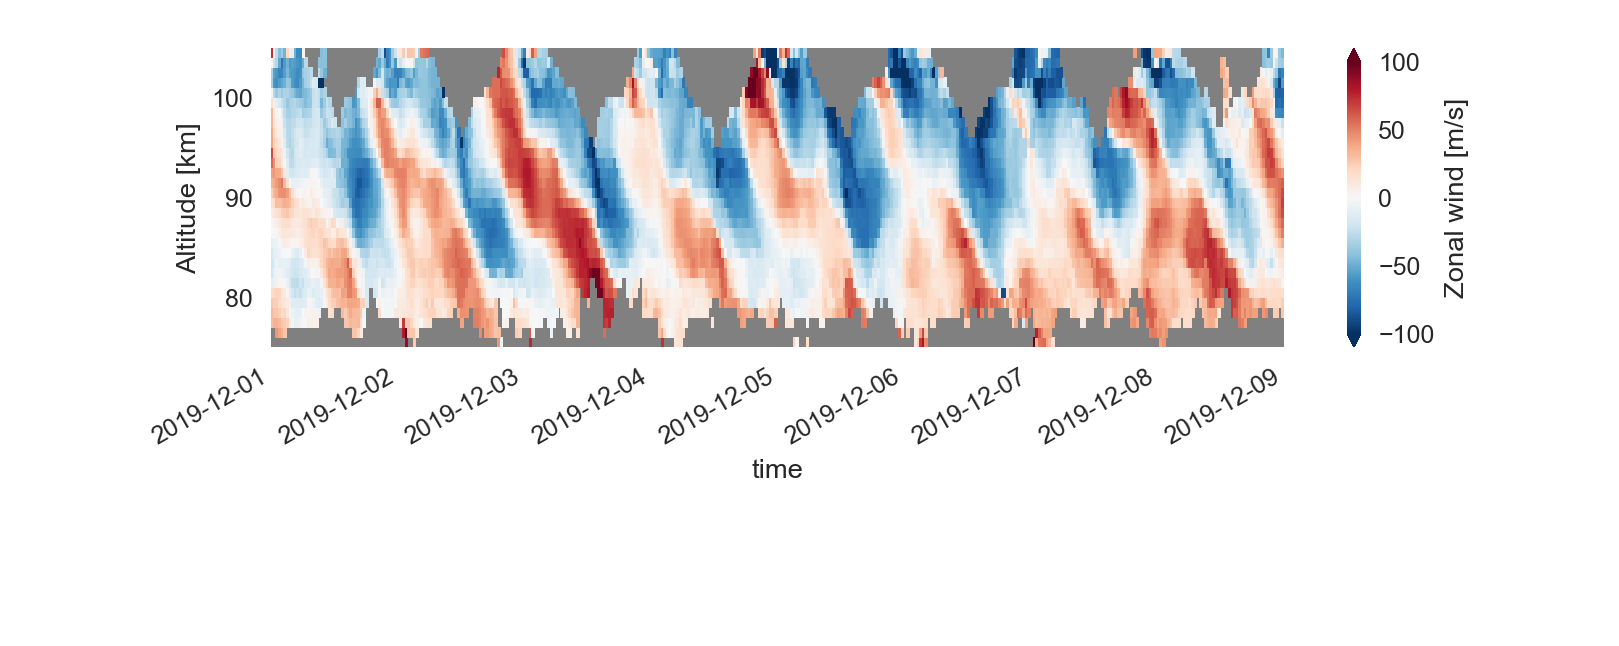

In [27]:
plt.figure(figsize=(5,2))
dsr.u0.T.plot(vmax=100, cbar_kwargs={'label': 'Zonal wind [m/s]'})
plt.ylabel('Altitude [km]')
plt.gca().set_facecolor('gray')
plt.tight_layout()

#### Select a single altitude

In [28]:
dsri = dsr.sel(alt=92.5)

<IPython.core.display.Javascript object>


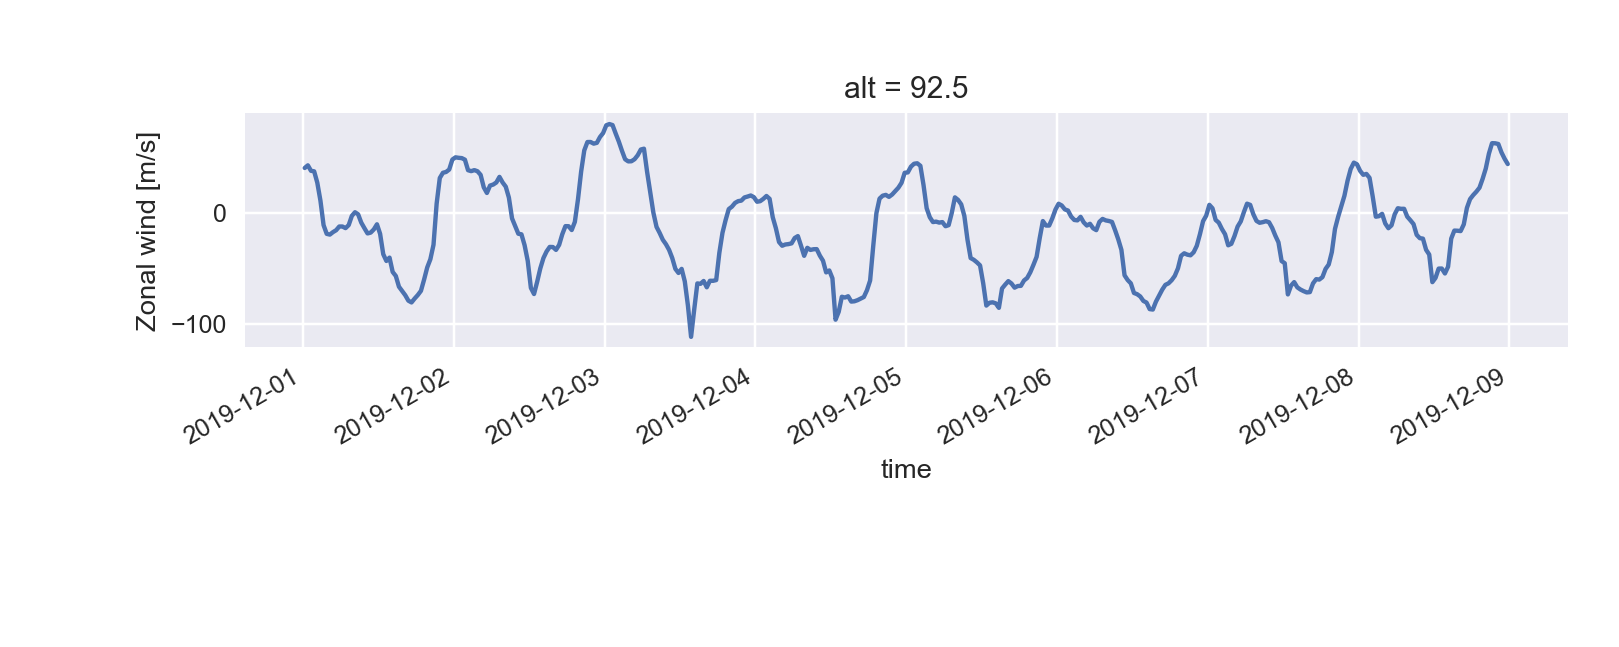

In [29]:
plt.figure(figsize=(5,2))
dsri.u0.plot()
plt.ylabel('Zonal wind [m/s]')
plt.tight_layout()

#### Now let's investigate the frequency content. Since this has been processed to be evenly sampled, we could use simple tools like the Fourier transform. But to maintain consistency with the above, we will use the Lomb-Scargle technique, which reduces to the Fourier transform for even sampling.

<IPython.core.display.Javascript object>


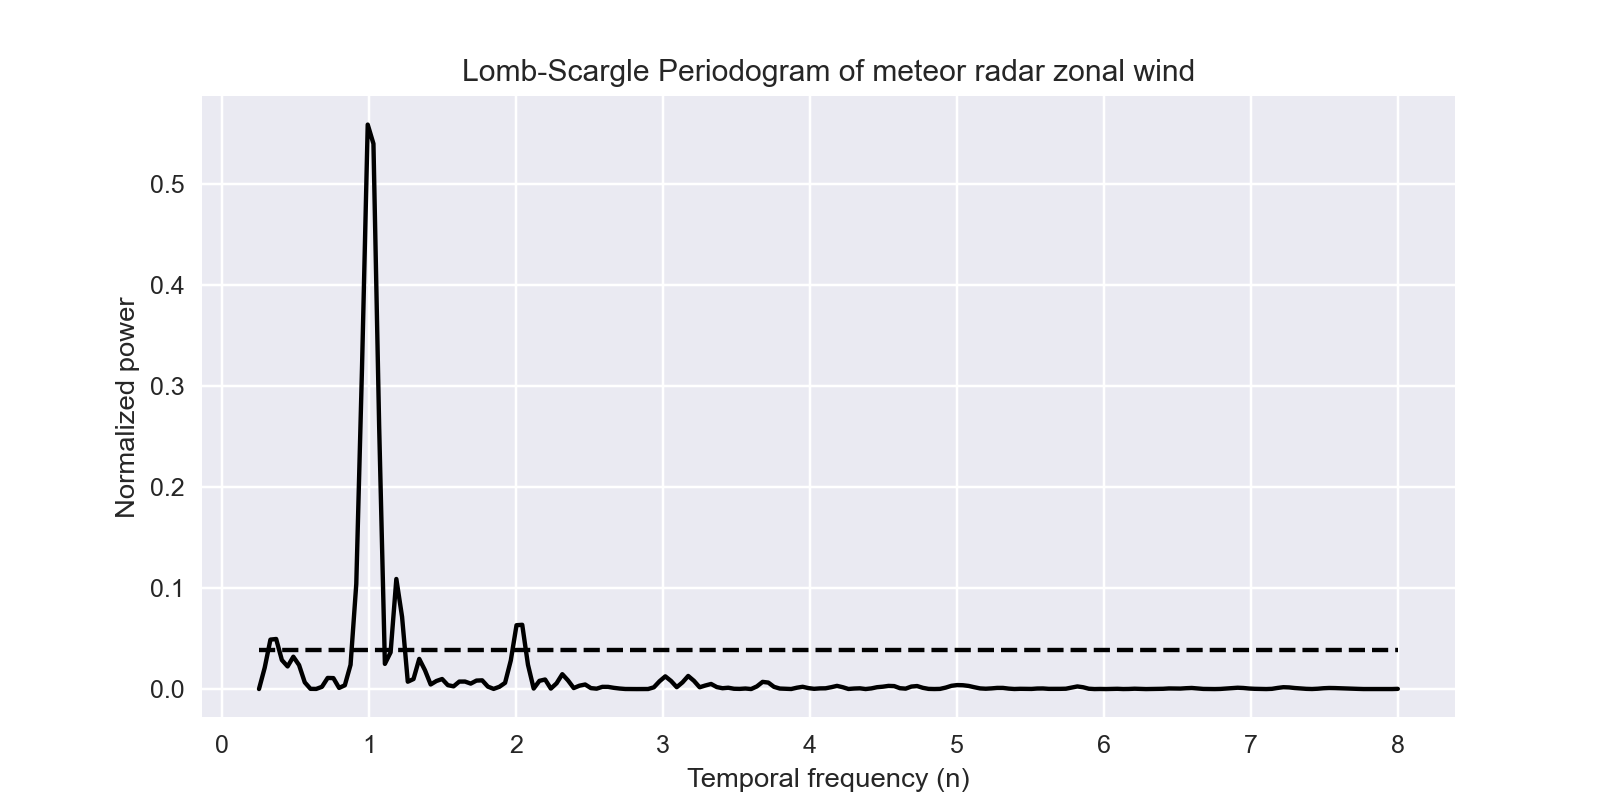

Text(0.5, 1.0, 'Lomb-Scargle Periodogram of meteor radar zonal wind')

In [30]:
Nn = 200 # number of temporal frequency samples
n = np.linspace(0.25, 8, Nn)

# Compute periodogram
tday = pd.to_timedelta(dsri.time - dsri.time[0]).total_seconds()/86400. # Convert to time in days
lomb = LombScargle(tday, dsri.u0) # Note that longitude is expressed in radians
p = lomb.power(n)

# And find false-alarm level (The level of power expected from noise at some level of confidence. Here we'll use 90%.)
fa = lomb.false_alarm_level(0.10, method='bootstrap', minimum_frequency = n[0], maximum_frequency = n[-1])

plt.figure(figsize=(5,2.5))
plt.plot(n, p, 'k-')
plt.plot(n, fa*np.ones_like(n), 'k--')

plt.xlabel('Temporal frequency (n)')
plt.ylabel('Normalized power')
plt.title('Lomb-Scargle Periodogram of meteor radar zonal wind')

# So far we've looked at the drivers (i.e., mesospheric/thermospheric winds)
# Next, let's look at the ionospheric responses

# Swarm EEJ

In [31]:
import cdflib

def read_swarm_eef(fn):
    '''
    Read a Swarm EEF file into a xr.Dataset.
    
    eej: units A/m (different than in Swarm files)
    
    Joanne Wu and Brian Harding, 18 Feb 2022
    '''

    a_cdf_file=cdflib.CDF(fn)

    qdlat=np.linspace(-20, 20, 81)
    a_time=cdflib.cdfepoch.encode(a_cdf_file.varget("Timestamp"))
    a_lon=a_cdf_file.varget("Longitude") # Geographic
    # a_lon[a_lon < 0]=a_lon[a_lon < 0]+360
    a_lat=a_cdf_file.varget("Latitude")
    a_EEF=a_cdf_file.varget("EEF")
    a_EEJ=a_cdf_file.varget("EEJ")
    a_RelErr=a_cdf_file.varget("RelErr")
    a_Flags=a_cdf_file.varget("Flags")

    ds = xr.Dataset(
                    coords = {
                        'time':pd.to_datetime(a_time),
                              'qdlat':qdlat
                    },
                    data_vars = {
                        'eej' : (['time','qdlat'], 1e-3*a_EEJ), # A/m
                        'lon' : (['time'], a_lon),
                        'lat' : (['time'], a_lat),
                        'eej_rel_err' : (['time'], a_RelErr),
                        'flag': (['time'], a_Flags),
                        'eef': (['time'], 1e-3*a_EEF), # V/m
                    }
    )
    
    # Add approximate slt
    t0 = pd.to_datetime(ds.time[0].item()).floor('1d') # reference 0 UT first day
    t = pd.to_datetime(ds.time.values)
    thr = (t-t0).total_seconds()/3600.
    ds['slt_appx'] = (['time'], np.mod( thr + 24./360 * ds.lon.values, 24 ))
    
    return ds


In [32]:
dss = read_swarm_eef('SW_OPER_EEFATMS_2F_20200827T000000_20200827T235959_0204.cdf')

In [33]:
dss

<xarray.Dataset>
Dimensions:      (time: 16, qdlat: 81)
Coordinates:
  * time         (time) datetime64[ns] 2020-08-27T00:12:04.729000 ... 2020-08...
  * qdlat        (qdlat) float64 -20.0 -19.5 -19.0 -18.5 ... 18.5 19.0 19.5 20.0
Data variables:
    eej          (time, qdlat) float64 -0.01071 -0.006283 ... 0.001731 0.002852
    lon          (time) float64 126.7 103.3 79.85 56.45 ... -177.6 158.9 135.5
    lat          (time) float64 7.278 7.045 7.102 6.665 ... 2.554 6.582 7.621
    eej_rel_err  (time) float64 0.5668 0.9893 1.347 ... 0.9365 1.396 0.7505
    flag         (time) uint16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    eef          (time) float64 -0.0002844 0.0002541 ... 5.715e-06 -7.464e-05
    slt_appx     (time) float64 8.646 8.639 8.634 8.626 ... 8.556 8.562 8.56

<IPython.core.display.Javascript object>


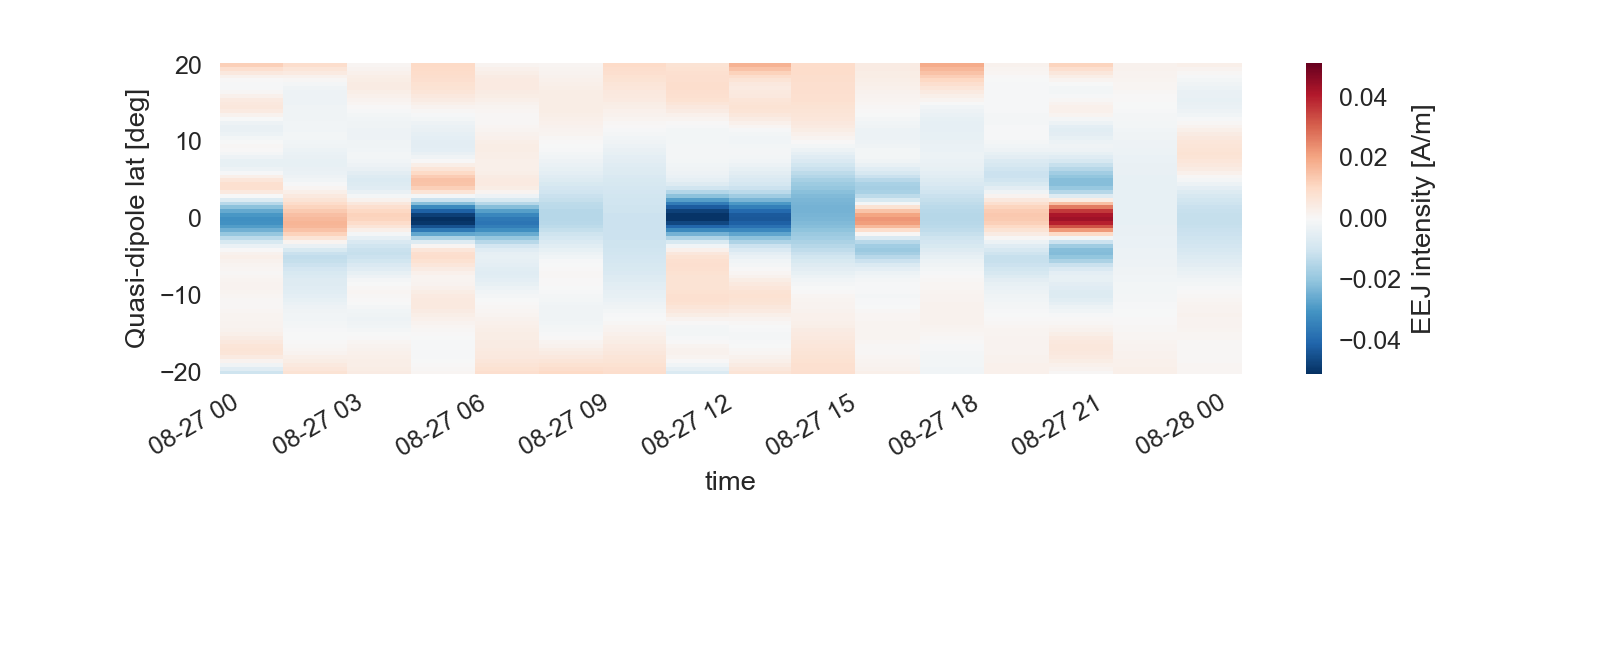

In [34]:
plt.figure(figsize=(5,2))
dss.eej.T.plot(cbar_kwargs={'label': 'EEJ intensity [A/m]'})
plt.ylabel('Quasi-dipole lat [deg]')
plt.tight_layout()

<IPython.core.display.Javascript object>


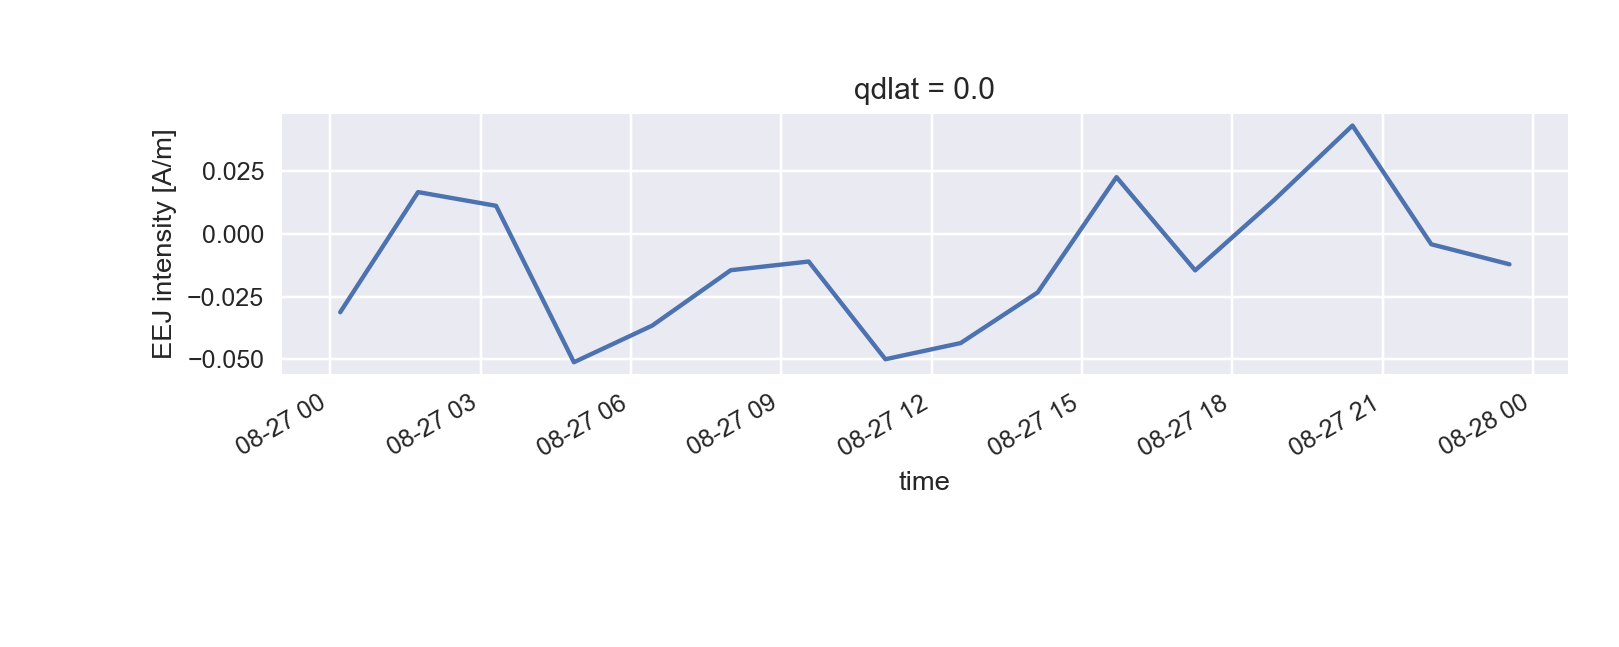

In [35]:
plt.figure(figsize=(5,2))
dss.eej.sel(qdlat=0).plot()
plt.ylabel('EEJ intensity [A/m]')
plt.tight_layout()

<IPython.core.display.Javascript object>


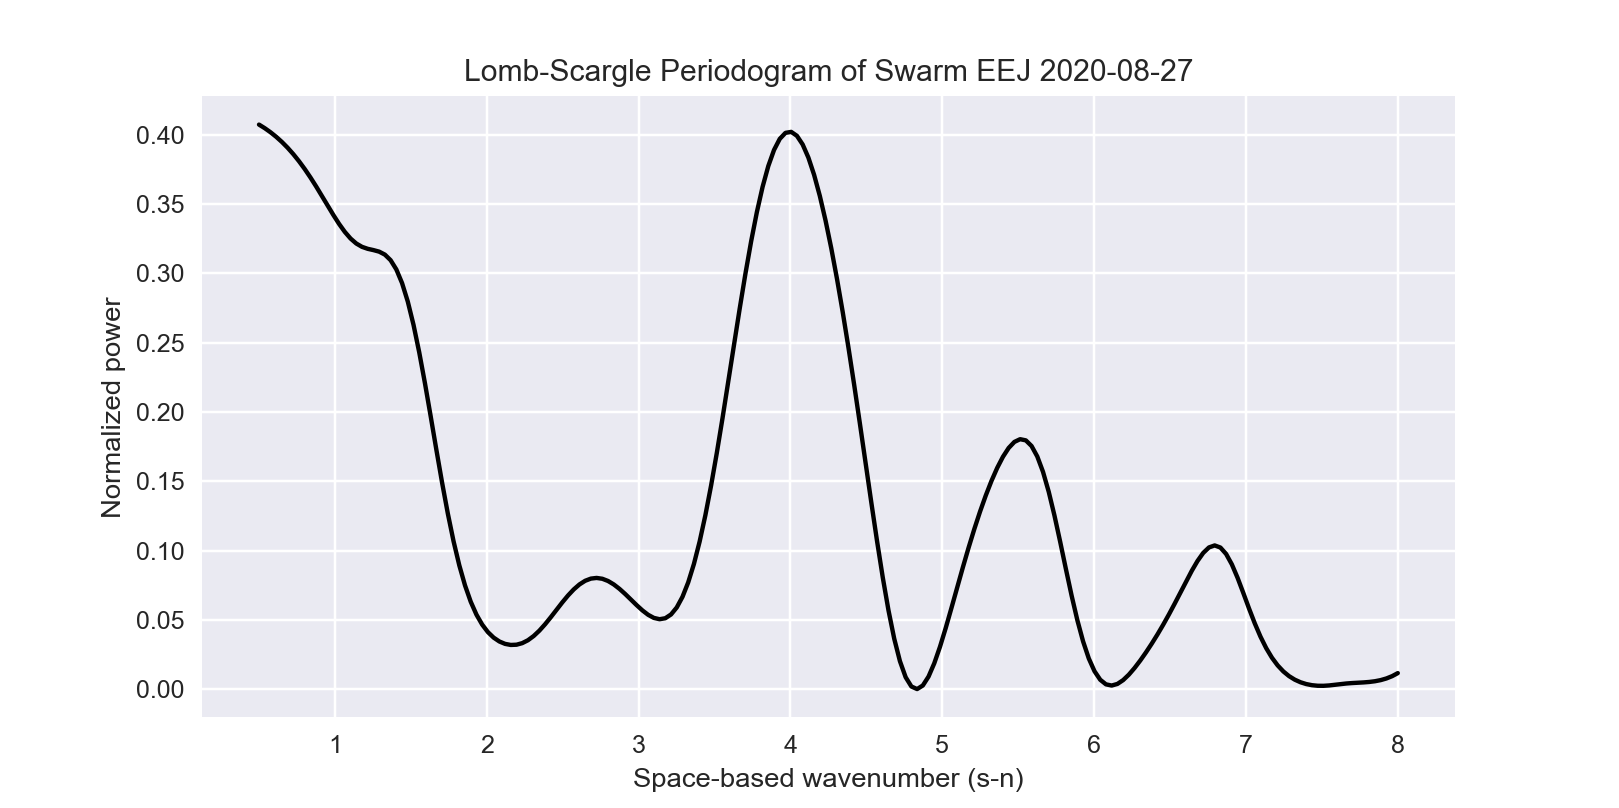

Text(0.5, 1.0, 'Lomb-Scargle Periodogram of Swarm EEJ 2020-08-27')

In [36]:
Nk = 200 # number of frequency samples
k = np.linspace(0.5, 8, Nk) # k = |s-n|, running from half a day to 7-per-day (Nyquist rate for 15 orbits per day gives 7.5

# Compute periodogram
lomb = LombScargle(dss.lon / 360., dss.eej.sel(qdlat=0)) # Note that longitude is expressed in radians
                                                           # Note that we are evaluating the eej at 0 qdlat
p = lomb.power(k)

plt.figure(figsize=(5,2.5))
plt.plot(k, p, 'k-')

plt.xlabel('Space-based wavenumber (s-n)')
plt.ylabel('Normalized power')
plt.title('Lomb-Scargle Periodogram of Swarm EEJ 2020-08-27')

## This suggests that the low-latitude electric field is responding to wave-4 forcing in the winds (likely DE3)

#### Caveat: Not every analysis turns out this clean! Consider issues of LT sampling, latitude sampling, geographic vs geomagnetic coordinates, high-latitude influences, instrument errors, etc. Please don't use this as anything more than an example.

# Any impact in the ionospheric densities? 

Can use:
 - global Total Electron Content (TEC) from GNSS/GPS systems
 - COSMIC-2 radio occultation
 - Global ionosondes
 - ICON-EUV
 - ICON-IVM

# ICON-IVM

In [38]:
# This is a simple reader for IVM L2.7 data

def L27_to_dataset(L27_fn, dm_flag_thresh=np.inf, rpa_flag_thresh=np.inf):
    '''
    Read a L27 file into an xarray.Dataset.
    
    Also add ascending/descending flag and do some other housekeeping.
    '''
    
    ds0 = xr.open_dataset(L27_fn)
    
    # Build new dataset with certain variables
    epoch = ds0.Epoch 
    t = pd.to_datetime(pd.to_datetime('1970-01-01') + pd.to_timedelta(epoch.values, unit='ms'))
    
    d = {
        'ni':         (['time'], ds0.ICON_L27_Ion_Density.values),
        'Ti':         (['time'], ds0.ICON_L27_Ion_Temperature.values),
        'mag_lat':    (['time'], ds0.ICON_L27_Magnetic_Latitude.values),
        'mag_lon':    (['time'], ds0.ICON_L27_Magnetic_Longitude.values),
        'apexht':     (['time'], ds0.ICON_L27_Apex_Height.values),
        'drift_mer':  (['time'], ds0.ICON_L27_Ion_Velocity_Meridional.values),
        'drift_zon':  (['time'], ds0.ICON_L27_Ion_Velocity_Zonal.values),
        'drift_fa':   (['time'], ds0.ICON_L27_Ion_Velocity_Field_Aligned.values),
        'lat':        (['time'], ds0.ICON_L27_Latitude.values),
        'lon':        (['time'], ds0.ICON_L27_Longitude.values),
        'alt':        (['time'], ds0.ICON_L27_Altitude.values),
        'slt':        (['time'], ds0.ICON_L27_Solar_Local_Time.values),
        'dm_flag':    (['time'], ds0.ICON_L27_DM_Flag.values),
        'rpa_flag':   (['time'], ds0.ICON_L27_RPA_Flag.values),
    }


    ds = xr.Dataset(
        d,
        coords={
            'time':('time',t),
        }
    )
    
    ds = ds.sortby('time') # This is sometimes necessary for a reason I don't understand
    
    # Add ascending/descending flag
    iref = 4 # Use a particular altitude to reference ascending/descending
    dsi = ds.dropna(dim='time', subset=['lat']) # Drop so that dlat calculation is never nan
    dlat = dsi.lat.diff(dim='time')
    asc = dlat >= 0
    desc = dlat < 0
    assert (asc | desc).all(), "Something went wrong: every point should be either ascending or descending."
    dt = pd.to_timedelta(dsi.time[1:].values - dsi.time[:-1].values)
    long_gap = dt > pd.to_timedelta('5min') # It is too risky to go over a gap longer than 5min. Set asc=nan
    ds['asc'] = asc.where(~long_gap)
    
    # Quality control
    ds = ds.where((ds.dm_flag < dm_flag_thresh) & (ds.rpa_flag < rpa_flag_thresh))

    ds0.close()
    del ds0
    return ds



In [39]:
dsi = L27_to_dataset('ICON_L2-7_IVM-A_2020-08-27_v06r000.NC')

In [40]:
dsi

<xarray.Dataset>
Dimensions:    (time: 86400)
Coordinates:
  * time       (time) datetime64[ns] 2020-08-26T23:59:57.284000 ... 2020-08-2...
Data variables: (12/15)
    ni         (time) float64 9.081e+04 9.043e+04 ... 7.163e+04 7.192e+04
    Ti         (time) float64 912.2 910.1 908.5 ... 1.646e+03 1.643e+03
    mag_lat    (time) float32 -3.629 -3.629 -3.621 ... -12.05 -12.03 -12.03
    mag_lon    (time) float32 359.6 359.6 359.6 359.7 ... 335.5 335.5 335.5
    apexht     (time) float32 612.1 612.1 612.0 611.8 ... 916.7 915.9 915.9
    drift_mer  (time) float64 37.56 37.24 37.44 37.41 ... 27.27 27.77 27.72
    ...         ...
    lon        (time) float32 286.7 286.7 286.7 286.8 ... 260.1 260.2 260.2
    alt        (time) float32 585.3 585.3 585.3 585.3 ... 593.7 593.7 593.7
    slt        (time) float32 19.09 19.09 19.09 19.09 ... 17.32 17.32 17.32
    dm_flag    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rpa_flag   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    asc        (time) float64 nan 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

<IPython.core.display.Javascript object>


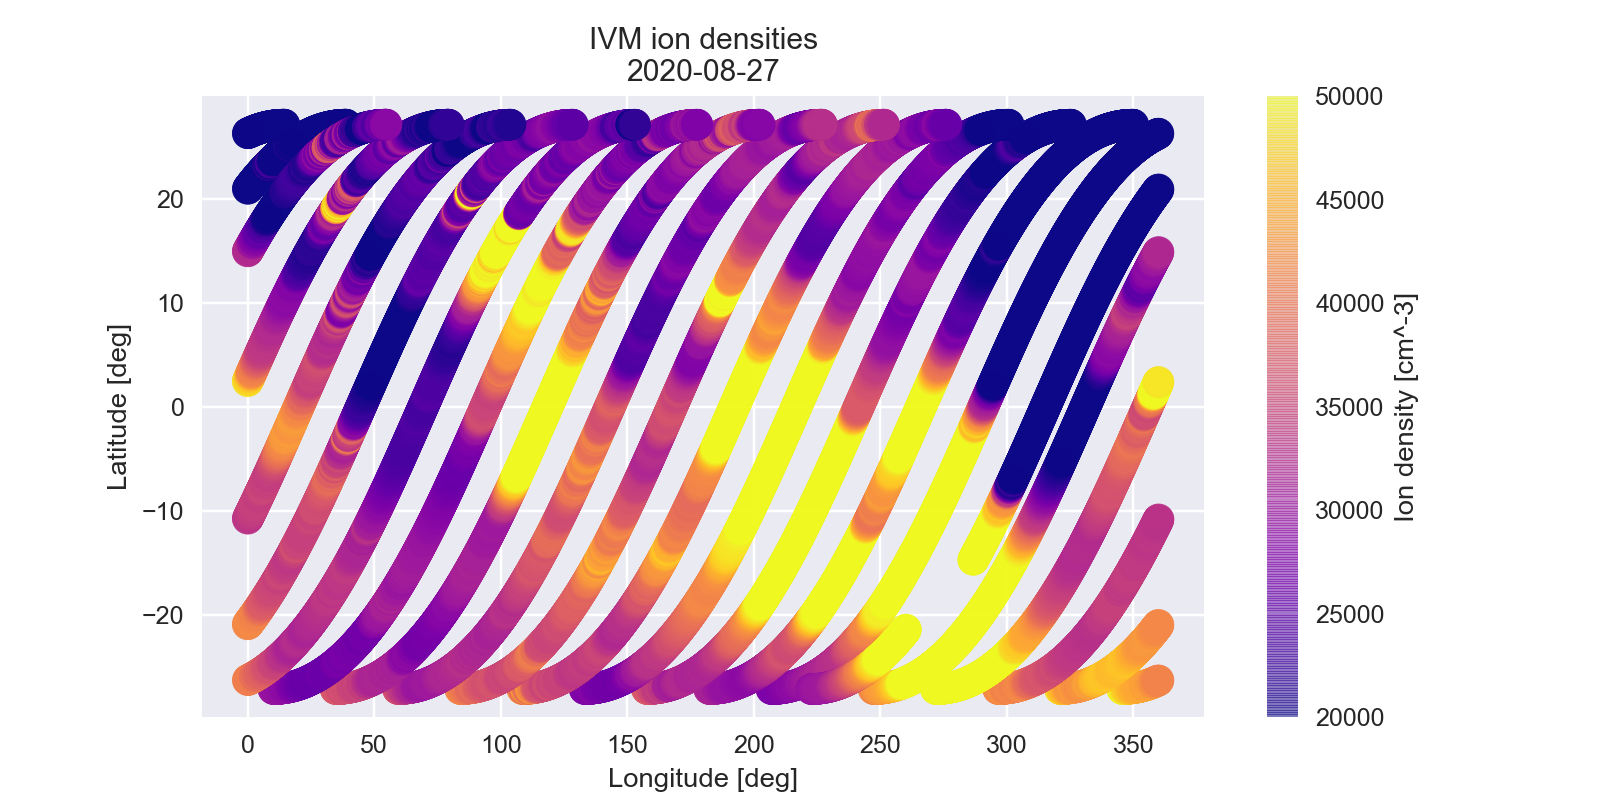

Text(0.5, 1.0, 'IVM ion densities\n2020-08-27')

In [41]:
# Pick just the ascending orbit
dsi2 = dsi.where(dsi.asc == 1)

plt.figure(figsize=(5,2.5))
plt.scatter(dsi2.lon, dsi2.lat, s=150, alpha=0.5, c=dsi.ni, cmap='plasma', vmin=20e3, vmax=50e3)
plt.colorbar(label='Ion density [cm^-3]')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.title('IVM ion densities\n2020-08-27')

# Can you find a wave-4 pattern?
Try to apply Lomb Scargle code to IVM data on your own.

In [42]:
# Your code here

#### Also consider:
 - The ionospheric density responds not just to electric fields but also to field-aligned momentum transfer, changes in production/loss chemistry, etc.
 - The density measurement is not sampled at the same latitudes nor altitudes as the winds
 - There is a wave-1 influence inherent to the geometry: The magnetic equator does not align with the geographic equator.
   - Many plasma parameters are organized in magnetic coordinates. If magnetic latitudes are used in the analysis it breaks the assumption of a constant LT.